In [1]:
import sys
sys.path.append("..")
import models
import policy_gradient_methods as policy_gradient_methods
import utils
import gymnasium as gym
import torch
import random
import math

# Settings

In [2]:
ENVIRONMENT_ID = "CartPole-v1"
NUM_RUNS_PER_METHOD = 8
NUM_EPISODES_PER_RUN = 10
GRAD_CLIP_VALUE = 10
GAMMA = 0.99
NN_HIDDEN_LAYER_SIZES = [8, 4]
RNG_SEED = 7
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
print("PyTorch device:", device)
torch.manual_seed(RNG_SEED)
random.seed(RNG_SEED)

PyTorch device: cpu


# REINFORCE

## Linear model

Started run 0/7 0
Started run 1/7 1
Started run 2/7 2
Started run 3/7 3
Started run 4/7 4
Started run 5/7 5
Started run 6/7 6
Started run 7/7 7


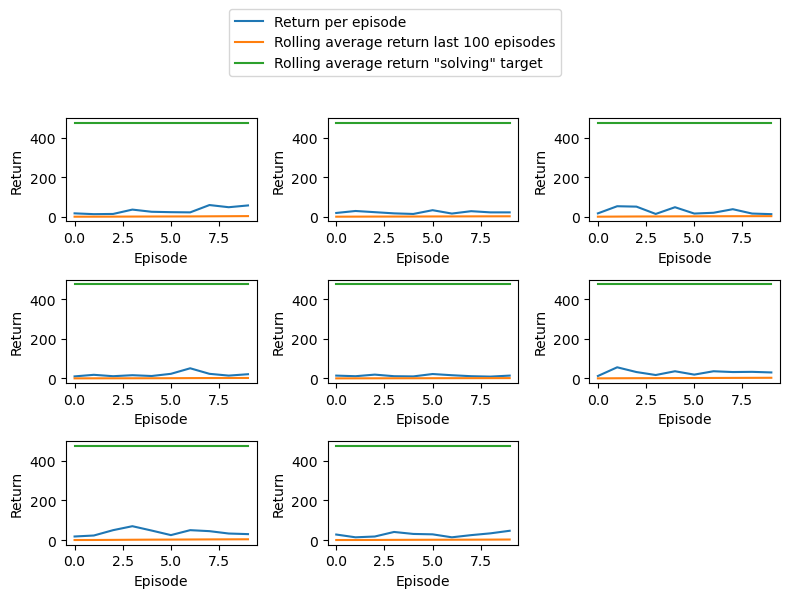

In [3]:
returns_per_run = []
env = gym.make(ENVIRONMENT_ID)
for run in range(NUM_RUNS_PER_METHOD):
    print(f"Started run {run}/{NUM_RUNS_PER_METHOD - 1}", run)
    policy_model = torch.nn.Sequential(
        torch.nn.Linear(env.observation_space.shape[0], env.action_space.n),
        torch.nn.Softmax(dim=1)
    ).to(device)
    policy_optimizer = torch.optim.SGD(policy_model.parameters(), lr=0.01)
    returns, states, actions, rewards = policy_gradient_methods.train_episodic_reinforce(
        env, policy_model, policy_optimizer, device, RNG_SEED, NUM_EPISODES_PER_RUN, GAMMA, GRAD_CLIP_VALUE
    )
    returns_per_run.append(returns)
env.close()
utils.plot_returns_multiple_runs(returns_per_run, env.spec.reward_threshold)